In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
resident=pd.read_csv('../CARD_SPENDING_DATA/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt',delimiter='\t',encoding='euc-kr')
foreigner=pd.read_csv('../CARD_SPENDING_DATA/CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt',delimiter='\t',encoding='euc-kr')

In [7]:
resident.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [8]:
resident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   STD_DD      int64 
 1   GU_CD       int64 
 2   DONG_CD     int64 
 3   MCT_CAT_CD  int64 
 4   SEX_CD      object
 5   AGE_CD      int64 
 6   USE_CNT     int64 
 7   USE_AMT     int64 
dtypes: int64(7), object(1)
memory usage: 154.9+ MB


### Data Describtion
- STD_DD	기준일자
- GU_CD	구코드
- DONG_CD	행정동코드
- MCT_CAT_CD	업종코드
- SEX_CD	성별코드
- AGE_CD	나이코드
- USE_CNT	이용건수
- USE_AMT	이용금액

In [9]:
foreigner.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0


In [10]:
print('resident:' , resident.shape ,"foreigner:" , foreigner.shape)

resident: (2537753, 8) foreigner: (238829, 7)


In [11]:
resident.isnull().sum()

STD_DD        0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
SEX_CD        0
AGE_CD        0
USE_CNT       0
USE_AMT       0
dtype: int64

In [12]:
foreigner.isnull().sum()

STD_DD        0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
COUNTRY_NM    0
USE_CNT       0
USE_AMT       3
dtype: int64

In [13]:
resident['YEAR']=resident['STD_DD']//10000
resident['MONTH']=(resident['STD_DD']//100)%100
resident=resident.drop(['STD_DD'],axis=1)

foreigner['YEAR']=foreigner['STD_DD']//10000
foreigner['MONTH']=(foreigner['STD_DD']//100)%100

In [14]:
resident.head()

,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,YEAR,MONTH
0,110,517,10,F,25,11,595,2019,2
1,110,517,10,F,50,5,243,2019,2
2,110,517,10,F,55,5,27,2019,2
3,110,517,10,M,20,11,243,2019,2
4,110,517,10,M,25,11,433,2019,2


In [15]:
print("resident year: ", resident['YEAR'].unique(),"resident month: ",resident['MONTH'].unique())
print("foreigner year: ", foreigner['YEAR'].unique(),"foreigner month: ",foreigner['MONTH'].unique())

resident year:  [2019 2020] resident month:  [2 3 4 5]
foreigner year:  [2019 2020] foreigner month:  [2 4 3 5]


In [16]:
print("GU_CD unique",resident.GU_CD.unique())
print("DONG_CD unique",resident.DONG_CD.unique())
print("AGE_CD unique",resident.AGE_CD.unique())
print("MCT_CAT_CD unique",resident.MCT_CAT_CD.unique())
print("USE_CNT unique",resident.USE_CNT.unique())
print("USE_AMT unique",resident.USE_AMT.unique())

GU_CD unique [110 140 260 350]
DONG_CD unique [517 545 565 575 585 595 640 650 660 670 680 690 520 540 550 570 580 590
 605 615 625 635 645 665 510 530 560 561 601 602 610 620 630 651 652 661
 662 600 611 612 619 621 624 695 700 710 720]
AGE_CD unique [25 50 55 20 30 35 40 45 65 60]
MCT_CAT_CD unique [10 20 21 31 32 33 34 40 52 62 70 71 80 81 92 22 30 35 42 44 50 43 60]
USE_CNT unique [  11    5   16 ... 9383 7291 3829]
USE_AMT unique [  595   243    27 ... 79763 37522 56055]


In [28]:
# 나이별 이용 금액
for i in range(20,70,5):
    print("total spending of AGE_CD: ",i ," , ",resident[resident['AGE_CD']==i].USE_AMT.sum())

total spending of AGE_CD:  20  ,  345604059
total spending of AGE_CD:  25  ,  746116992
total spending of AGE_CD:  30  ,  726108683
total spending of AGE_CD:  35  ,  790366967
total spending of AGE_CD:  40  ,  756676736
total spending of AGE_CD:  45  ,  882011212
total spending of AGE_CD:  50  ,  793963553
total spending of AGE_CD:  55  ,  596300453
total spending of AGE_CD:  60  ,  430390045
total spending of AGE_CD:  65  ,  495977349


#### 정규분포 곡선을 따름

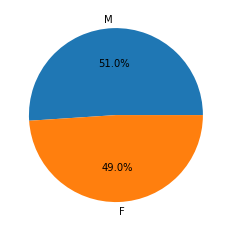

In [18]:
resident.SEX_CD.value_counts()
plt.figure()
categories = ['M','F']
plt.pie(resident.SEX_CD.value_counts(),labels=categories,autopct='%0.1f%%')
plt.show()

In [19]:
resident.GU_CD.value_counts()

350    761412
260    746820
140    667106
110    362415
Name: GU_CD, dtype: int64

*  110 - 대구 중구
*  140 - 서울 중구
*  260 - 대구 수성구
*  350 - 서울 노원구

Text(0.5, 0, 'year')

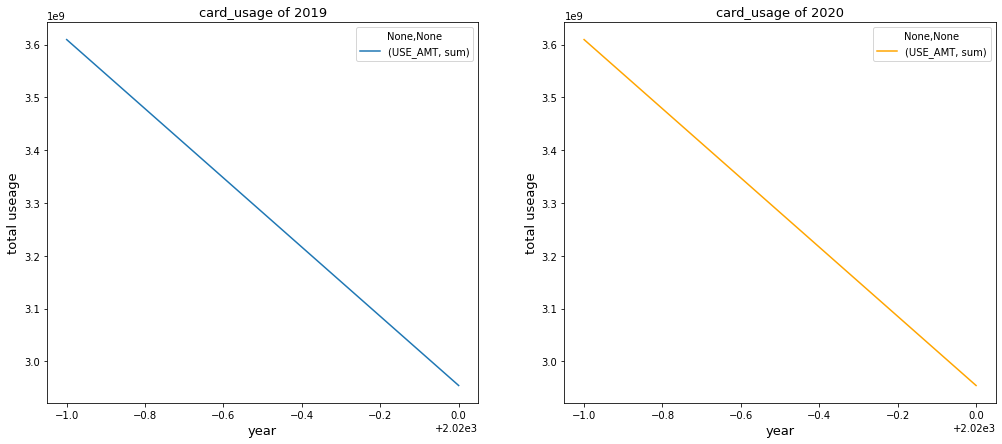

In [35]:
# 연도별 이용금액, 구별 이용금액, 성별 이용금액
total_date=resident.groupby(['YEAR']).agg({'USE_AMT':['sum']})
                            
total_gu=resident.groupby(['GU_CD']).agg({'USE_AMT':['sum']})
total_sex=resident.groupby(['SEX_CD']).agg({'USE_AMT':['sum']})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("card_usage of 2019", size=13)
ax1.set_ylabel("total useage", size=13)
ax1.set_xlabel("year", size=13)

total_date.plot(ax=ax2, color='orange')
ax2.set_title("card_usage of 2020", size=13)
ax2.set_ylabel("total useage", size=13)
ax2.set_xlabel("year", size=13)

> 서울의 카드 소비가 더 많다., 남여 사용 비용은 이용금액에 큰 영향이 없다. 2019년이 2020년보다 더 소비가 많다.(3,4,5월에 편협적이다)

## Data Visualization

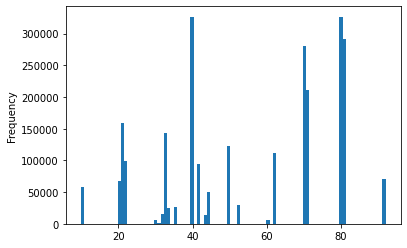

In [21]:
resident.MCT_CAT_CD.plot(kind='hist',bins=92)

In [22]:
resident.describe()

,GU_CD,DONG_CD,MCT_CAT_CD,AGE_CD,USE_CNT,USE_AMT,YEAR,MONTH
count,2.537753e+06,2.537753e+06,2.537753e+06,2.537753e+06,2.537753e+06,2.537753e+06,2.537753e+06,2.537753e+06
mean,2.340369e+02,6.103738e+02,5.529796e+01,4.226350e+01,1.088914e+02,2.586349e+03,2.019484e+03,3.551708e+00
std,9.356696e+01,5.176562e+01,2.277777e+01,1.383087e+01,5.574200e+02,9.715739e+03,4.997296e-01,1.117014e+00
min,1.100000e+02,5.100000e+02,1.000000e+01,2.000000e+01,4.000000e+00,2.000000e+00,2.019000e+03,2.000000e+00
25%,1.400000e+02,5.700000e+02,4.000000e+01,3.000000e+01,9.000000e+00,1.550000e+02,2.019000e+03,3.000000e+00
50%,2.600000e+02,6.110000e+02,6.200000e+01,4.000000e+01,2.200000e+01,5.280000e+02,2.019000e+03,4.000000e+00
75%,3.500000e+02,6.510000e+02,8.000000e+01,5.500000e+01,7.300000e+01,1.761000e+03,2.020000e+03,5.000000e+00
max,3.500000e+02,7.200000e+02,9.200000e+01,6.500000e+01,2.880000e+04,1.145021e+06,2.020000e+03,5.000000e+00
